In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# [Problem 1] Visualization of data

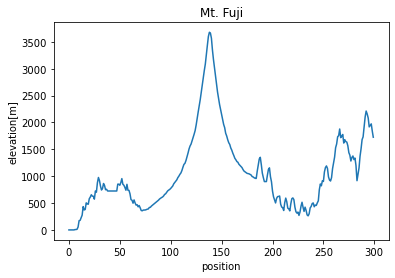

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()

# [Problem 2] Create a function to calculate the slope of a point

In [5]:
def calculate_slope(point):
    change_in_evaluation = fuji[:,0][point] - fuji[:,0][point-1]
    change_in_position = fuji[:,3][point] - fuji[:,3][point-1]
    slope = change_in_position/change_in_evaluation
    return slope
print(calculate_slope(0))

5.77190635451505


# [Problem 3] Create a function to calculate the destination

In [6]:
def calculate_destination(current_point,alpha,slope):
    destination_point = current_point - alpha*slope
    if (destination_point <= 0):
        return 0
    else:
        return round(destination_point)    
alpha = 0.2
current_point = 50
slope = calculate_slope(current_point)
print(calculate_destination(current_point,alpha,slope))

54


# [Problem 4] Creating a function to go down the mountain

In [10]:
def calculate_going_down(current_position_1,alpha_1):
    slope_1 = calculate_slope(current_position_1)
    positions = [current_position_1]
    for counter in range(fuji.size):
        current_position_1 = int(calculate_destination(current_position_1,alpha_1,slope_1))
        if (positions[-1] == current_position_1):
            break
        else:
            positions.append(current_position_1)
    return positions
alpha_2 = 0.2
print(calculate_going_down(136,alpha_2))

[136, 102, 68, 34, 0]


# [Problem 5] Visualization of the descent process

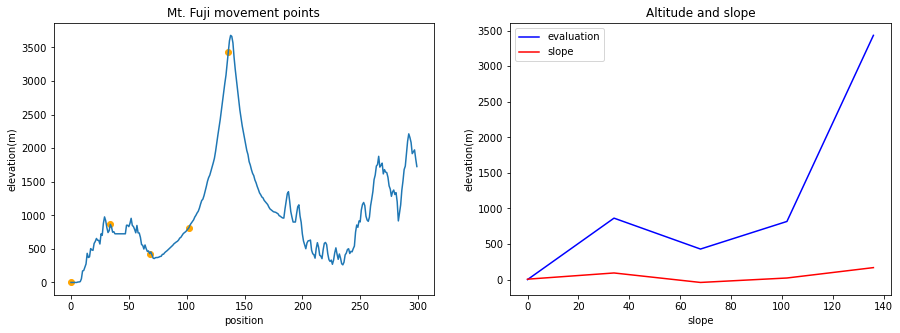

In [11]:
positions_array = calculate_going_down(136,alpha_2)
figure = plt.figure(figsize=(15,5))
fig1 = figure.add_subplot(1,2,1)

fig1.set_title("Mt. Fuji movement points")
fig1.set_xlabel("position")
fig1.set_ylabel("elevation(m)")
fig1.plot(fuji[:,0],fuji[:,3])
fig1.scatter(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="orange")

fig2 = figure.add_subplot(1,2,2)

fig2.set_title("Altitude and slope")
fig2.set_xlabel("slope")
fig2.set_ylabel("elevation(m)")
fig2.plot(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="red",label="evaluation")
fig2.plot(positions_array,[calculate_slope(position_2) for position_2 in positions_array],c="yellow",label="slope")
fig2.legend()
plt.show()

# [Problem 6] Change of initial value

<Figure size 1080x360 with 0 Axes>

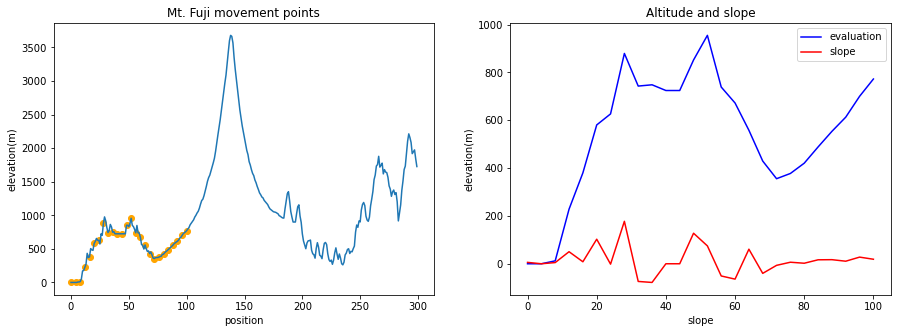

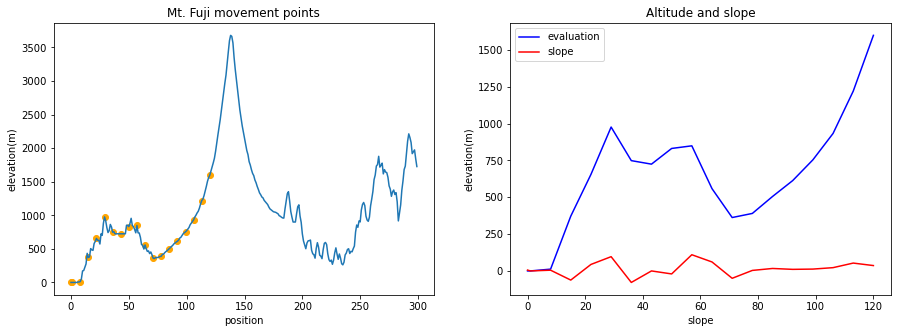

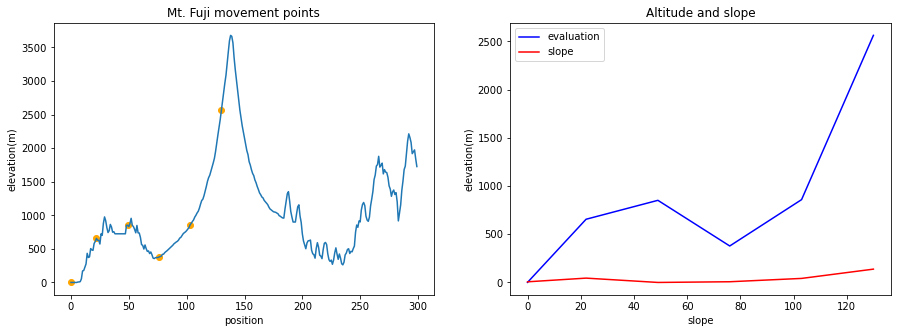

In [12]:
import matplotlib.pyplot as plt

def display_graph_on_give_points(points):    
    
    figure = plt.figure(figsize=(15,5))
    alpha_3 = 0.2
    for point_5 in range(points.size):
    
        positions_array_1 = calculate_going_down(points[point_5],alpha_3)
        
        figure = plt.figure(figsize=(15,5))
        
        fig1 = figure.add_subplot(1,2,1)
        
        fig1.set_title("Mt. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="orange")

        fig2 = figure.add_subplot(1,2,2)

        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="red",label="evaluation")
        fig2.plot(positions_array_1,[calculate_slope(position_2) for position_2 in positions_array_1],c="yellow",label="slope")
        fig2.legend()
        plt.show()   
points = np.array([100,120,130])
display_graph_on_give_points(points)

# [Problem 7] (Advance problem) Change hyperparameters

<Figure size 1080x360 with 0 Axes>

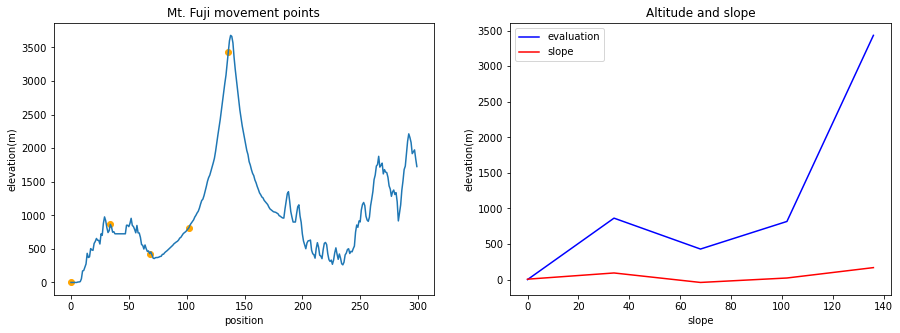

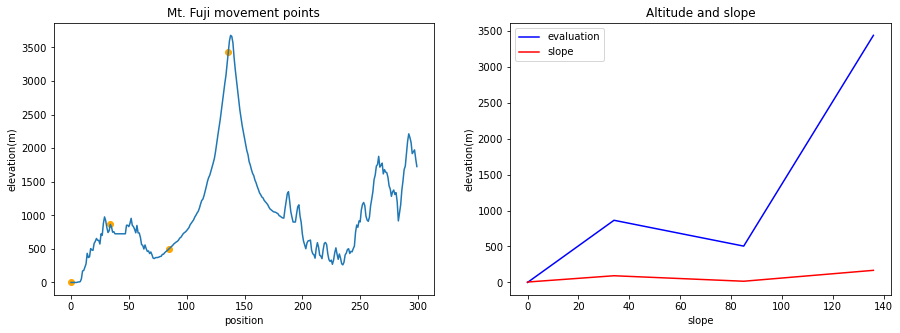

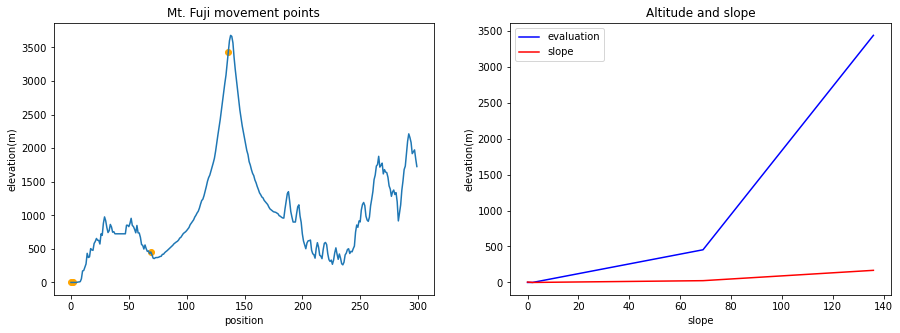

In [14]:
import matplotlib.pyplot as plt

def display_graph_on_give_alpha_points(alphas):    
    
    figure = plt.figure(figsize=(15,5))
    
    for point_6 in range(alphas.size):
    
        positions_array_1 = calculate_going_down(136,alphas[point_6])
        
        figure = plt.figure(figsize=(15,5))
        
        fig1 = figure.add_subplot(1,2,1)
        
        fig1.set_title("Mt. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="blue")

        fig2 = figure.add_subplot(1,2,2)

        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="red",label="evaluation")
        fig2.plot(positions_array_1,[calculate_slope(position_2) for position_2 in positions_array_1],c="blue",label="slope")
        fig2.legend()
        plt.show()   
alphas_1 = np.array([0.2,0.3,0.4])
display_graph_on_give_alpha_points(alphas_1)